# Aula 6 - Regressão Múltipla

## Limitações da regressão linear simples

In [72]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import linregress

In [7]:
# Ler base de dados
housing = pd.read_csv('../data/housing_prices.csv')

In [10]:
# Ler estrutura de dados
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price_usd     45 non-null     int64  
 1   beds          45 non-null     int64  
 2   baths         45 non-null     float64
 3   built_sqm     45 non-null     float64
 4   km_to_resort  45 non-null     float64
 5   km_to_base    45 non-null     float64
 6   land_sqm      45 non-null     float64
 7   cars          45 non-null     int64  
 8   age           45 non-null     int64  
 9   days_listed   45 non-null     int64  
dtypes: float64(5), int64(5)
memory usage: 3.6 KB


In [11]:
# Estatísticas descritivas dos dados
housing.describe()

,price_usd,beds,baths,built_sqm,km_to_resort,km_to_base,land_sqm,cars,age,days_listed
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,391191.111111,3.288889,2.333333,176.579778,19.953333,22.384000,9344.972667,1.422222,22.133333,122.022222
std,132600.555021,1.160373,0.992872,63.456694,22.470133,22.802025,27432.990972,1.033284,20.304052,91.611951
min,160000.000000,1.000000,1.000000,71.350000,0.000000,1.610000,404.700000,0.000000,3.000000,16.000000
25%,300000.000000,3.000000,2.000000,133.780000,3.220000,8.050000,971.280000,0.000000,12.000000,62.000000
50%,378000.000000,3.000000,2.000000,172.610000,11.260000,11.260000,1821.150000,2.000000,17.000000,98.000000
75%,496000.000000,4.000000,2.500000,200.670000,32.180000,24.140000,3885.120000,2.000000,23.000000,150.000000
max,690000.000000,6.000000,4.750000,360.000000,83.670000,80.450000,161880.000000,4.000000,80.000000,412.000000


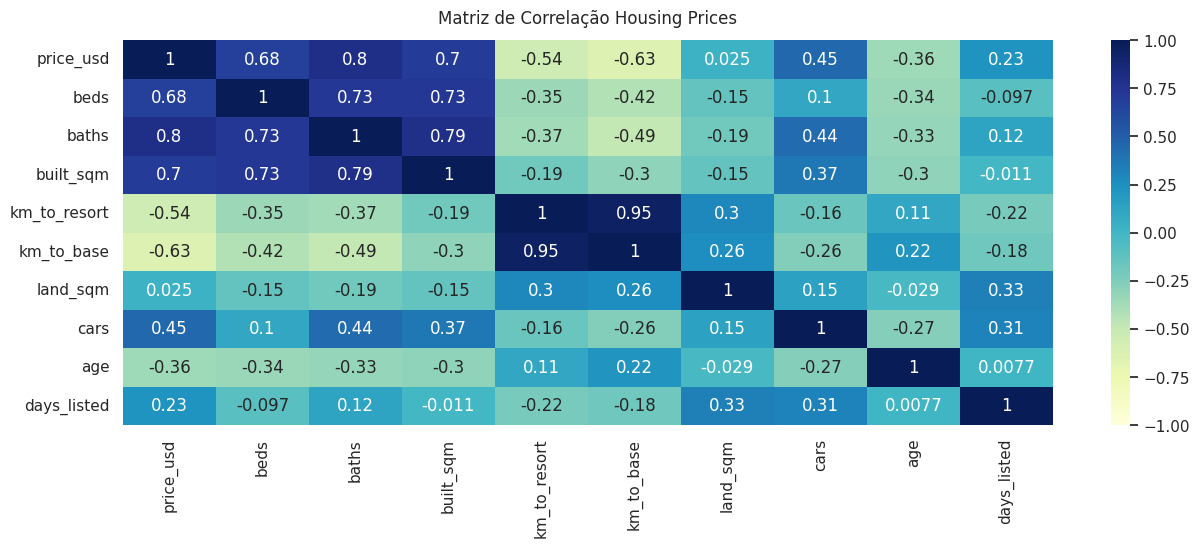

In [23]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(housing.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Matriz de Correlação Housing Prices', fontdict={'fontsize':12}, pad=12)
plt.show()

<AxesSubplot: xlabel='built_sqm', ylabel='price_usd'>

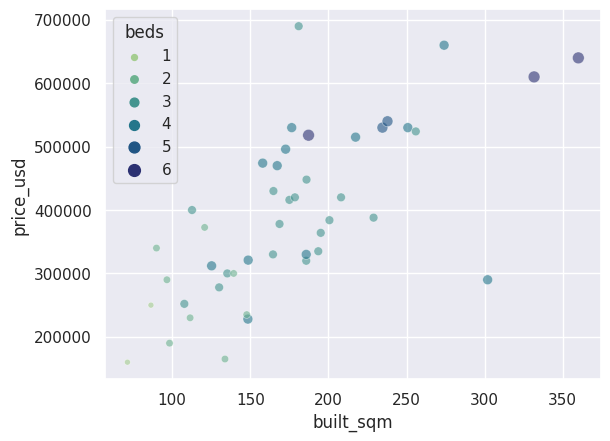

In [55]:
sns.scatterplot(x='built_sqm', y='price_usd', hue='beds',  size='beds', palette='crest', alpha=0.6, data=housing)

LinregressResult(slope=77170.36759189794, intercept=137386.3465866468, rvalue=0.6753092593487783, pvalue=3.6054687841134296e-07, stderr=12852.75067748794, intercept_stderr=44769.90238686056)

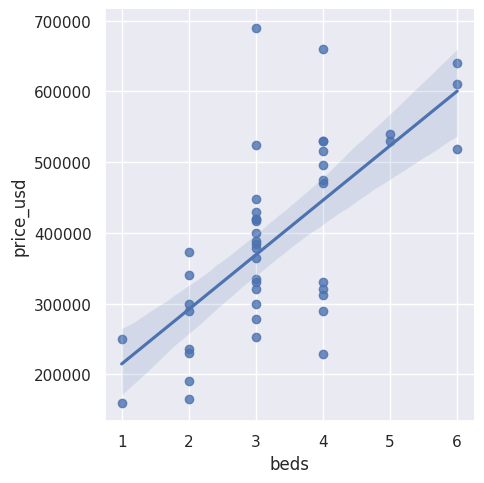

In [30]:
# Relação Dormitórios e Valor do Imóvel
sns.lmplot(x='beds', y='price_usd', data=housing)
linregress(x=housing['beds'], y=housing['price_usd'])

O modelo linear simples sugere que o preço padrão do imóvel é cerca de 137.400 dólares (interceptação) com um acréscimo de 77.200 dólares (slope) por dormitório.

LinregressResult(slope=106861.86359269932, intercept=141846.76272814604, rvalue=0.8001488906659917, pvalue=4.251692031657766e-11, stderr=12215.892539263123, intercept_stderr=30924.14853020802)

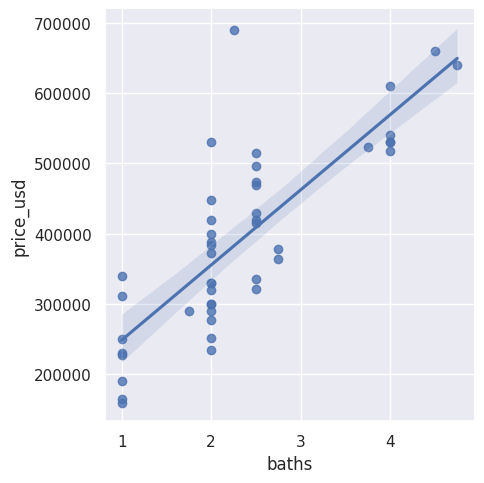

In [40]:
# Relação Banheiros e Valor do Imóvel
sns.lmplot(x='baths', y='price_usd', data=housing)
linregress(x=housing['baths'], y=housing['price_usd'])

O modelo linear simples sugere que o preço padrão do imóvel é cerca de 141.800 dólares (interceptação) com um acréscimo de 106.300 dólares (slope) por banheiro.

LinregressResult(slope=1456.5485176884943, intercept=133994.09753512515, rvalue=0.6970389648555408, pvalue=1.0421211862438647e-07, stderr=228.49303522584194, intercept_stderr=42818.94038311097)

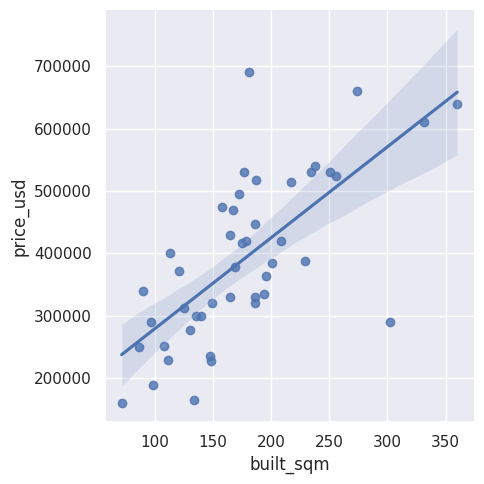

In [43]:
# Relação Banheiros e Valor do Imóvel
sns.lmplot(x='built_sqm', y='price_usd', data=housing)
linregress(x=housing['built_sqm'], y=housing['price_usd'])

O modelo linear simples sugere que o preço padrão do imóvel é cerca de 134.000 dólares (interceptação) com um acréscimo de 1.456 dólares (slope) por metro quadrado construído.

## Regressão Múltipla

In [70]:
# Modelo de regressão múltipla com as variáveis beds, baths e built_sqm para predição de price_usd (simplificado)
multiple = smf.ols('price_usd ~ beds + baths + built_sqm', data=housing).fit()
multiple.params

Intercept    105262.398679
beds          17836.103251
baths         79901.811315
built_sqm       231.228012
dtype: float64

O modelo linear múltiplo sugere que o preço padrão do imóvel é cerca de 105.200 dólares (interceptação) com um acréscimo de 17.800 dólares/dormitório , 79.900 dólares/banheiro e 231 dólares/m2 construído. 

In [71]:
# Modelo de regressão múltipla com as variáveis beds, baths e built_sqm para predição de price_usd (completo)
simple_regression = ['beds', 'baths', 'built_sqm']
outcome='price_usd'
pred_sum = '+'.join(simple_regression)
formula = outcome + '~' +pred_sum
model = smf.ols(formula=formula, data=housing).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     26.68
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           9.86e-10
Time:                        16:32:10   Log-Likelihood:                -569.77
No. Observations:                  45   AIC:                             1148.
Df Residuals:                      41   BIC:                             1155.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.053e+05   3.84e+04      2.740      0.009    2.77e+04    1.83e+05
beds        1.784e+04   1.64e+04      1.091      0.282   -1.52e+04    5.09e+04
baths        7.99e+04   2.14e+04      3.739      0.001    3.67e+04    1.23e+05
built_sqm    231.2280    331.782      0.697      0.490    -438.819     901.275
==============================================================================
Omnibus:                       24.438   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.855
Skew:                           1.513   Prob(JB):                     6.69e-11
Kurtosis:                       6.980   Cond. No.                         614.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Filtrar variáveis em subconjunto
housing_sub1 = housing[['price_usd', 'beds', 'baths', 'built_sqm']]
housing_sub1

,price_usd,beds,baths,built_sqm
0,330000,3,2.00,164.53
1,400000,3,2.00,112.69
2,416000,3,2.50,175.03
3,420000,3,2.00,178.56
4,496000,4,2.50,172.61
5,690000,3,2.25,180.97
6,230000,2,1.00,111.48
7,448000,3,2.00,185.99
8,160000,1,1.00,71.35
9,250000,1,1.00,86.40


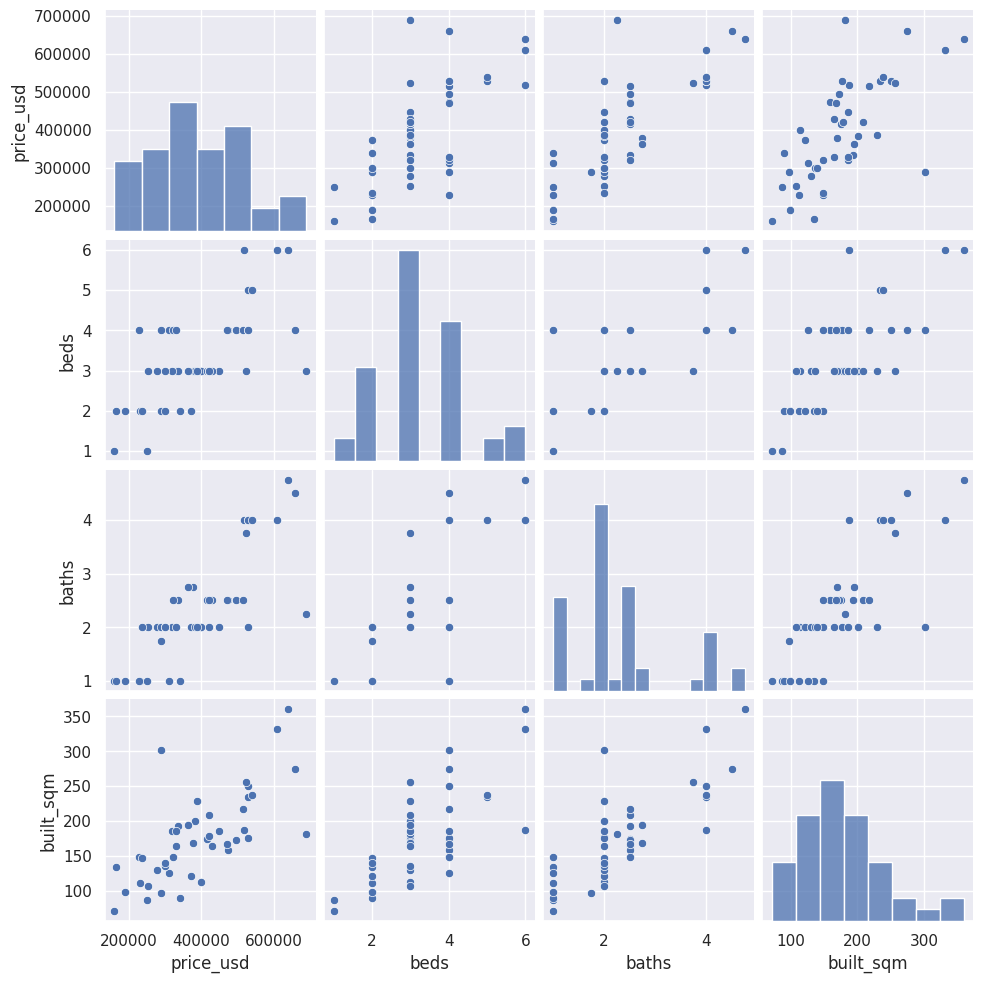

In [59]:
# Plotar diagrama de pares
sns.pairplot(housing_sub1)
plt.show()

In [63]:
# Agrupar imóveis por número de dormitórios
housing_types = housing.groupby('beds')
mean_price_by_type = housing_types['price_usd'].mean()
print(mean_price_by_type)

beds
1    205000.000000
2    265325.000000
3    393166.666667
4    429666.666667
5    535000.000000
6    589333.333333
Name: price_usd, dtype: float64


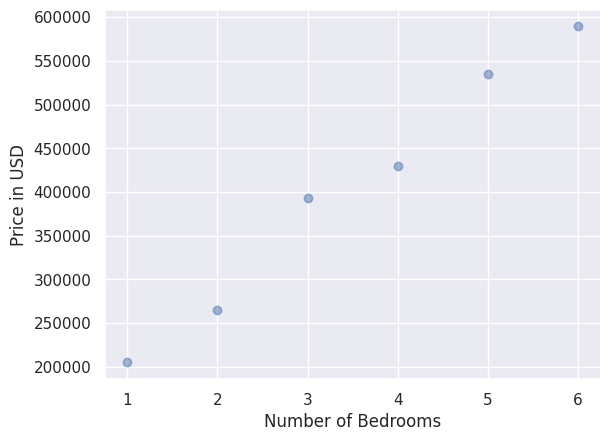

In [68]:
plt.plot(mean_price_by_type, 'o', alpha=0.5)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in USD')
plt.show()

In [73]:
# Modelo de regressão múltipla com as variáveis beds, baths e built_sqm para predição de price_usd (simplificado)
multiple = smf.ols('price_usd ~ beds + baths + built_sqm', data=housing).fit()

# Montar base de dados genérica
df = pd.DataFrame()
df['built_sqm'] = np.linspace(50, 400)
df['beds'] = np.linspace(1, 6)
df['baths'] = 1

# Gerar e plotar predições
pred = multiple.predict(df)
print(pred.head())

0    232397.817074
1    240572.042569
2    248746.268065
3    256920.493561
4    265094.719057
dtype: float64


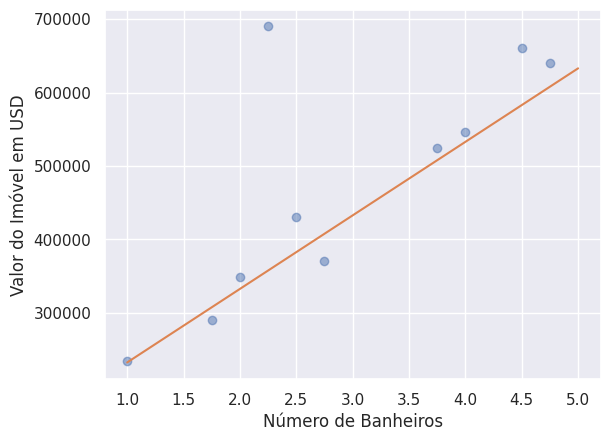

In [78]:
# Plotar preço médio de cada tipo de imóvel (por número de banheiros)
plt.clf()
typologies = housing.groupby('baths')
mean_price_by_typology = typologies['price_usd'].mean()
plt.plot(mean_price_by_typology, 'o', alpha=0.5)

# Plotar predições
pred = multiple.predict(df)
plt.plot(df['baths'], pred, label='1 bathroom')

# Nomear eixos
plt.xlabel('Número de Banheiros')
plt.ylabel('Valor do Imóvel em USD')
plt.show()